<a href="https://colab.research.google.com/github/LEEAHRI/Child-Abuse/blob/main/%E1%84%92%E1%85%A1%E1%86%AB%E1%84%80%E1%85%B3%E1%86%AFBERT%2BHuggingFace(%E1%84%83%E1%85%AC%E1%84%82%E1%85%B3%E1%86%AB%E1%84%80%E1%85%A5%E1%86%BA_%E1%84%87%E1%85%AE%E1%86%AF%E1%84%8B%E1%85%AD%E1%86%BC%E1%84%8B%E1%85%A5_%E1%84%8E%E1%85%AE%E1%84%80%E1%85%A1%2C_rhino_%E1%84%89%E1%85%A1%E1%84%8B%E1%85%AD%E1%86%BC%2C_%E1%84%83%E1%85%A1%E1%84%8C%E1%85%AE%E1%86%BC%E1%84%87%E1%85%AE%E1%86%AB%E1%84%85%E1%85%B2_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from transformers import *
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
import re

from math import pi
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existen

구글 드라이브와 Colab을 연동합니다.

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
os.listdir('gdrive/My Drive/pytest')

['Sentiment Analysis Dataset.csv',
 'iris.csv',
 'test.csv',
 'ratings_morphed.txt',
 '김소월시.txt',
 '윤동주시.txt',
 'ratings.txt',
 'wiki_test.txt',
 'negative.txt',
 'positive.txt',
 'ratings_small.txt',
 'kor-eng',
 '네이버뉴스-생활문화_다중',
 'word2vec',
 'aclImdb_v1_small',
 'similarity',
 'fra-eng',
 'rathings_morphed.txt',
 'rathings.txt',
 'stopwords-ko.txt',
 '크롤링 20000개.csv',
 '학대별 라벨.xlsx',
 'bert',
 '위험별 척도 유형 200개씩.xlsx',
 'Child_Abuser.csv']

In [ ]:
!apt-get update
!apt-get install g++ openjdk-8-jdk

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++ 

In [ ]:
!pip install JPype1==0.7.4
!pip install rhinoMorph

In [ ]:
import rhinoMorph
rn = rhinoMorph.startRhino()

filepath:  /usr/local/lib/python3.6/dist-packages
classpath:  /usr/local/lib/python3.6/dist-packages/rhinoMorph/lib/rhino.jar
RHINO started!


In [ ]:
df = pd.read_excel('gdrive/My Drive/pytest/위험별 척도 유형 200개씩.xlsx')

In [ ]:
df['Label'].unique()

array([4, 6, 3, 0, 1, 2, 5])

In [ ]:
df

,번호,내용,Label
0,1,겁나게 대들다가 아빠한테 맞음 맞앗단건아닌것같고\n밀쳣는데 내가 내동댕이쳐지고 그랫...,4
1,2,내가 평소 아빠하고 사이도 좋고 살면서 한번도 맞은적 없었는데 오늘 처음 목덜미에 ...,4
2,3,"초4때 한 번,초6때 한번,중2때 한번 이렇게 총 3번을 아빠한테 맞았어 훈육?그런...",4
3,4,아빠한테 머리 쥐어잡히고 뺨맞았어 칼도들고\n진짜 계속 방에서 울고있는데 경제적인것...,4
4,5,자느라 어른들한테 나와서 인사안했다고 엄마는 암말도 안하고 지켜봄 하필이면 안보이는...,4
...,...,...,...
1725,1726,안녕하세요이제 예비고1이 되는데요 현재 중3입니다.대구살구요정말 아빠때문에 미치겠습...,6
1726,1727,"현재 15개월아기와 배속에 5주된아기엄마입니다.남편은 올해 38살,저는 33살 5살...",6
1727,1728,아버지의 알콜중독으로 인해 부모님의 이혼절차를 밟기를 원합니다. 귀책사항.문제가 되...,6
1728,1729,알콜중독인지 ..알콜의존인지..솔직히 잘모르겠는데..저희 집안이 원래 술을 대체적으...,6


In [ ]:
def text_cleaning(doc):
    
    doc = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", doc)
        
    return doc

In [ ]:
def text_tokenizing(doc):
    return [word for word in rhinoMorph.onlyMorph_list(rn,doc, pos = ['NNG', 'NNP','NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi = False) if word not in SW and len(word) > 1]

    # for word in doc:
    #   word = word.split()
    #   for words in word:
    #     if words not in SW and len(words) > 1:
      
    #       return words

In [ ]:
def define_stopwords(path):
    
    SW = set() 
    #집합형태로 만들어줘야 중복을 제외하고 출력해줌
    #불용어들을 추가할려면 SW.add()이렇게 넣어주면 됨
    
    with open(path, encoding = 'cp949') as f:
        for word in f:
            SW.add(word)
            
    return SW

SW = define_stopwords('gdrive/My Drive/pytest/stopwords-ko.txt')

In [ ]:
a = []
for i in SW:
  a.append(i.replace("\n",""))

In [ ]:
SW = set()

In [ ]:
for i in a:
  SW.add(i)

In [ ]:
SW

{'',
 'ㅋ',
 'ㅋㅋ',
 'ㅋㅋㅋ',
 'ㅎ',
 'ㅎㅎ',
 'ㅎㅎㅎ',
 'ㅠ',
 'ㅠㅠ',
 'ㅠㅠㅠ',
 'ㅡ',
 'ㅡㅡ',
 'ㅡㅡㅡ',
 '가',
 '가까스로',
 '가령',
 '가지',
 '각',
 '각각',
 '각자',
 '각종',
 '갖고말하자면',
 '같다',
 '같이',
 '개의치않고',
 '거니와',
 '거바',
 '거의',
 '것',
 '것과 같이',
 '것들',
 '게다가',
 '겨우',
 '견지에서',
 '결과에 이르다',
 '결국',
 '결론을 낼 수 있다',
 '겸사겸사',
 '고려하면',
 '고로',
 '곧',
 '공동으로',
 '과',
 '과연',
 '관계가 있다',
 '관계없이',
 '관련이 있다',
 '관하여',
 '관한',
 '관해서는',
 '구',
 '구체적으로',
 '그',
 '그것',
 '그들',
 '그때',
 '그래',
 '그래도',
 '그래서',
 '그러',
 '그러나',
 '그러니',
 '그러니까',
 '그러면',
 '그러므로',
 '그러한즉',
 '그런 까닭에',
 '그런데',
 '그런즉',
 '그럼',
 '그럼에도 불구하고',
 '그렇게',
 '그렇게 함으로써',
 '그렇지',
 '그렇지 않다면',
 '그렇지 않으면',
 '그렇지만',
 '그렇지않으면',
 '그리',
 '그리고',
 '그리하',
 '그리하여',
 '그만이다',
 '그에 따르는',
 '그위에',
 '그저',
 '그중에서',
 '그치지 않다',
 '근거로',
 '근거하여',
 '근데',
 '기대여',
 '기점으로',
 '기준으로',
 '기타',
 '까닭으로',
 '까악',
 '까지',
 '까지 미치다',
 '까지도',
 '끙끙',
 '끼익',
 '나',
 '나머지는',
 '나오',
 '남들',
 '남짓',
 '내공',
 '너',
 '너무',
 '너희',
 '너희들',
 '네',
 '넷',
 '논하지 않다',
 '누가 알겠는가',
 '누구',
 '다니',
 '다른',
 '다른 방면으로',
 '다만',
 '다섯',
 '다소',
 '다수

In [ ]:
list1 = df.values.tolist()

In [ ]:
# Senti = []
# for line in list1:
#   Senti.append(line[2])

In [ ]:
# Senti = pd.DataFrame(Senti)

# Senti.rename(columns = { 0 : 'Label'}, inplace = True)

In [ ]:
# labels = Senti['Label']

# classes = sorted(labels.unique())

In [ ]:
# label_to_cat = dict()

# for i in range(len(classes)):
#   dummy = np.zeros((len(classes),), dtype = 'int8')
#   dummy[i] = 1
#   label_to_cat[classes[i]] = dummy

# label_to_cat

In [ ]:
# y = np.array([label_to_cat[label] for label in Senti.Label])

In [ ]:
for line in list1:
  print(line[1])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
a = []
for line in list1:
  if text_tokenizing(text_cleaning(str(line[1]))):
    a.append([text_tokenizing(text_cleaning(str(line[1]))), line[2]])

In [ ]:
Senti = []
for line in a:
  Senti.append(line[1])

In [ ]:
Senti = pd.DataFrame(Senti)

Senti.rename(columns = { 0 : 'Label'}, inplace = True)

In [ ]:
labels = Senti['Label']

classes = sorted(labels.unique())

In [ ]:
label_to_cat = dict()

for i in range(len(classes)):
  dummy = np.zeros((len(classes),), dtype = 'int8')
  dummy[i] = 1
  label_to_cat[classes[i]] = dummy

label_to_cat

{0: array([1, 0, 0, 0, 0, 0, 0], dtype=int8),
 1: array([0, 1, 0, 0, 0, 0, 0], dtype=int8),
 2: array([0, 0, 1, 0, 0, 0, 0], dtype=int8),
 3: array([0, 0, 0, 1, 0, 0, 0], dtype=int8),
 4: array([0, 0, 0, 0, 1, 0, 0], dtype=int8),
 5: array([0, 0, 0, 0, 0, 1, 0], dtype=int8),
 6: array([0, 0, 0, 0, 0, 0, 1], dtype=int8)}

In [ ]:
y = np.array([label_to_cat[label] for label in Senti.Label])

In [ ]:
print(len(a))
print(len(y))

1725
1725


In [ ]:
# y = pd.Series(y)

In [ ]:
# a = pd.Series(a)

# DF = pd.concat([a,y], axis = 1)

In [ ]:
################### 여기부터 #########################

In [ ]:
# #텍스트 클리닝과 텍스트 토큰화
# #from konlpy.tag import Okt 보통의 경우에는 Okt를 사용하지 x
# import json
# import os
# import re
# from pprint import pprint

# # okt = Okt()
# # mecab = Mecab()
# # kkma = Kkma()
# # hannanum = Hannanum()

# # 불용어들을 SW에 저장 

# if os.path.exists('train_docs.json'): #op.path.exists() 어떤 파일이 디렉토리에 있는지 확인하는 함수 있으면 true출력
#     with open("train_docs.json", encoding='utf-8') as f: #if를 만족하면 파일을 불러올 수 있다 
#         train_data = json.load(f)
# else:
#     #토큰화와 클리닝까지 
#     #투플은 리스트와 비슷하지만 값은 변경할 수 없다 
#     #line[1]을 토큰화하는 이유는 line[1]에 리뷰가 존재
#     #클리닝을 먼저하고 토큰화를 하는게 좋다 
#     train_data = [(text_tokenizing(text_cleaning(line[1])), line[2])for line in list1 if text_tokenizing(text_cleaning(line[1]))]
#     #클리닝을 넣고 토큰화진행  
#     #이게 토큰화만 수행하는 코드 train_data = [(text_tokenizing(line[1]), line[2]) for line in train_docs if text_tokenizing(line[1])] if뒤에는 만약 ㅋㅋㅋ같은거는 토큰화하면 날라가므로 그러면 거기에는 빈 리스트만 존재하니깐 그걸 방지하기 위해
    
#     with open("train_docs.json", 'w', encoding='utf-8') as f:
#         json.dump(train_data, f, ensure_ascii=False, indent='\t')
        
# # if os.path.exists('test_docs.json'):
# #     with open("test_docs.json", encoding='utf-8') as f:
# #         test_data = json.load(f)
# # else:
# #     test_data = [(text_tokenizing(text_cleaning(line[1])), line[2]) for line in test_docs if text_tokenizing(text_cleaning(line[1]))]
# #     #test_data = [(text_tokenizing(line[1]), line[2]) for line in test_docs if text_tokenizing(line[1])]
# #     with open("test_docs.json", 'w', encoding='utf-8') as f:
# #         json.dump(test_data, f, ensure_ascii=False, indent='\t')

# # pprint(train_data[0])
# # pprint(test_data[0])

In [ ]:
b = []
for line in a:
  b.append(line[0])

In [ ]:
from sklearn.model_selection import train_test_split

# df_train, df_test = train_test_split(
#     b,y,
#     test_size = 0.2,
#     random_state = 410
# )

train_text, test_text, train_senti, test_senti = train_test_split(b, y, test_size = 0.3, stratify = y)

In [ ]:
print(len(train_text))
print(len(train_senti))

1207
1207


## 버트 인풋 만들기

한글 데이터를 분석하려면, 100개가 넘는 언어에 대해 훈련된 버트를 사용해야 합니다.  
이번에는 한국어 데이터로 훈련되었고, SKT에서 만든 KoBERT를 사용하도록 하겠습니다.  
모델을 로드하기에 앞서, 토크나이저를 불러오도록 하겠습니다.  
huggingface에서는 아주 쉽게 토크나이저를 불러올 수 있습니다.  
https://github.com/monologg/KoBERT-NER 에서 kobert를 tokenize 할 수 있는 코드를 가져왔습니다.

In [ ]:
import logging
import os
import unicodedata
from shutil import copyfile

from transformers import PreTrainedTokenizer


logger = logging.getLogger(__name__)

VOCAB_FILES_NAMES = {"vocab_file": "tokenizer_78b3253a26.model",
                     "vocab_txt": "vocab.txt"}

PRETRAINED_VOCAB_FILES_MAP = {
    "vocab_file": {
        "monologg/kobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert/tokenizer_78b3253a26.model",
        "monologg/kobert-lm": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert-lm/tokenizer_78b3253a26.model",
        "monologg/distilkobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/distilkobert/tokenizer_78b3253a26.model"
    },
    "vocab_txt": {
        "monologg/kobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert/vocab.txt",
        "monologg/kobert-lm": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert-lm/vocab.txt",
        "monologg/distilkobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/distilkobert/vocab.txt"
    }
}

PRETRAINED_POSITIONAL_EMBEDDINGS_SIZES = {
    "monologg/kobert": 512,
    "monologg/kobert-lm": 512,
    "monologg/distilkobert": 512
}

PRETRAINED_INIT_CONFIGURATION = {
    "monologg/kobert": {"do_lower_case": False},
    "monologg/kobert-lm": {"do_lower_case": False},
    "monologg/distilkobert": {"do_lower_case": False}
}

SPIECE_UNDERLINE = u'▁'


class KoBertTokenizer(PreTrainedTokenizer):
    """
        SentencePiece based tokenizer. Peculiarities:
            - requires `SentencePiece <https://github.com/google/sentencepiece>`_
    """
    vocab_files_names = VOCAB_FILES_NAMES
    pretrained_vocab_files_map = PRETRAINED_VOCAB_FILES_MAP
    pretrained_init_configuration = PRETRAINED_INIT_CONFIGURATION
    max_model_input_sizes = PRETRAINED_POSITIONAL_EMBEDDINGS_SIZES

    def __init__(
            self,
            vocab_file,
            vocab_txt,
            do_lower_case=False,
            remove_space=True,
            keep_accents=False,
            unk_token="[UNK]",
            sep_token="[SEP]",
            pad_token="[PAD]",
            cls_token="[CLS]",
            mask_token="[MASK]",
            **kwargs):
        super().__init__(
            unk_token=unk_token,
            sep_token=sep_token,
            pad_token=pad_token,
            cls_token=cls_token,
            mask_token=mask_token,
            **kwargs
        )

        # Build vocab
        self.token2idx = dict()
        self.idx2token = []
        with open(vocab_txt, 'r', encoding='utf-8') as f:
            for idx, token in enumerate(f):
                token = token.strip()
                self.token2idx[token] = idx
                self.idx2token.append(token)

        self.max_len_single_sentence = self.max_len - 2  # take into account special tokens
        self.max_len_sentences_pair = self.max_len - 3  # take into account special tokens

        try:
            import sentencepiece as spm
        except ImportError:
            logger.warning("You need to install SentencePiece to use KoBertTokenizer: https://github.com/google/sentencepiece"
                           "pip install sentencepiece")

        self.do_lower_case = do_lower_case
        self.remove_space = remove_space
        self.keep_accents = keep_accents
        self.vocab_file = vocab_file
        self.vocab_txt = vocab_txt

        self.sp_model = spm.SentencePieceProcessor()
        self.sp_model.Load(vocab_file)

    @property
    def vocab_size(self):
        return len(self.idx2token)

    def __getstate__(self):
        state = self.__dict__.copy()
        state["sp_model"] = None
        return state

    def __setstate__(self, d):
        self.__dict__ = d
        try:
            import sentencepiece as spm
        except ImportError:
            logger.warning("You need to install SentencePiece to use KoBertTokenizer: https://github.com/google/sentencepiece"
                           "pip install sentencepiece")
        self.sp_model = spm.SentencePieceProcessor()
        self.sp_model.Load(self.vocab_file)

    def preprocess_text(self, inputs):
        if self.remove_space:
            outputs = " ".join(inputs.strip().split())
        else:
            outputs = inputs
        outputs = outputs.replace("``", '"').replace("''", '"')

        if not self.keep_accents:
            outputs = unicodedata.normalize('NFKD', outputs)
            outputs = "".join([c for c in outputs if not unicodedata.combining(c)])
        if self.do_lower_case:
            outputs = outputs.lower()

        return outputs

    def _tokenize(self, text, return_unicode=True, sample=False):
        """ Tokenize a string. """
        text = self.preprocess_text(text)

        if not sample:
            pieces = self.sp_model.EncodeAsPieces(text)
        else:
            pieces = self.sp_model.SampleEncodeAsPieces(text, 64, 0.1)
        new_pieces = []
        for piece in pieces:
            if len(piece) > 1 and piece[-1] == str(",") and piece[-2].isdigit():
                cur_pieces = self.sp_model.EncodeAsPieces(piece[:-1].replace(SPIECE_UNDERLINE, ""))
                if piece[0] != SPIECE_UNDERLINE and cur_pieces[0][0] == SPIECE_UNDERLINE:
                    if len(cur_pieces[0]) == 1:
                        cur_pieces = cur_pieces[1:]
                    else:
                        cur_pieces[0] = cur_pieces[0][1:]
                cur_pieces.append(piece[-1])
                new_pieces.extend(cur_pieces)
            else:
                new_pieces.append(piece)

        return new_pieces

    def _convert_token_to_id(self, token):
        """ Converts a token (str/unicode) in an id using the vocab. """
        return self.token2idx.get(token, self.token2idx[self.unk_token])

    def _convert_id_to_token(self, index, return_unicode=True):
        """Converts an index (integer) in a token (string/unicode) using the vocab."""
        return self.idx2token[index]

    def convert_tokens_to_string(self, tokens):
        """Converts a sequence of tokens (strings for sub-words) in a single string."""
        out_string = "".join(tokens).replace(SPIECE_UNDERLINE, " ").strip()
        return out_string

    def build_inputs_with_special_tokens(self, token_ids_0, token_ids_1=None):
        """
        Build model inputs from a sequence or a pair of sequence for sequence classification tasks
        by concatenating and adding special tokens.
        A RoBERTa sequence has the following format:
            single sequence: [CLS] X [SEP]
            pair of sequences: [CLS] A [SEP] B [SEP]
        """
        if token_ids_1 is None:
            return [self.cls_token_id] + token_ids_0 + [self.sep_token_id]
        cls = [self.cls_token_id]
        sep = [self.sep_token_id]
        return cls + token_ids_0 + sep + token_ids_1 + sep

    def get_special_tokens_mask(self, token_ids_0, token_ids_1=None, already_has_special_tokens=False):
        """
        Retrieves sequence ids from a token list that has no special tokens added. This method is called when adding
        special tokens using the tokenizer ``prepare_for_model`` or ``encode_plus`` methods.
        Args:
            token_ids_0: list of ids (must not contain special tokens)
            token_ids_1: Optional list of ids (must not contain special tokens), necessary when fetching sequence ids
                for sequence pairs
            already_has_special_tokens: (default False) Set to True if the token list is already formated with
                special tokens for the model
        Returns:
            A list of integers in the range [0, 1]: 0 for a special token, 1 for a sequence token.
        """

        if already_has_special_tokens:
            if token_ids_1 is not None:
                raise ValueError(
                    "You should not supply a second sequence if the provided sequence of "
                    "ids is already formated with special tokens for the model."
                )
            return list(map(lambda x: 1 if x in [self.sep_token_id, self.cls_token_id] else 0, token_ids_0))

        if token_ids_1 is not None:
            return [1] + ([0] * len(token_ids_0)) + [1] + ([0] * len(token_ids_1)) + [1]
        return [1] + ([0] * len(token_ids_0)) + [1]

    def create_token_type_ids_from_sequences(self, token_ids_0, token_ids_1=None):
        """
        Creates a mask from the two sequences passed to be used in a sequence-pair classification task.
        A BERT sequence pair mask has the following format:
        0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
        | first sequence    | second sequence
        if token_ids_1 is None, only returns the first portion of the mask (0's).
        """
        sep = [self.sep_token_id]
        cls = [self.cls_token_id]
        if token_ids_1 is None:
            return len(cls + token_ids_0 + sep) * [0]
        return len(cls + token_ids_0 + sep) * [0] + len(token_ids_1 + sep) * [1]

    def save_vocabulary(self, save_directory):
        """ Save the sentencepiece vocabulary (copy original file) and special tokens file
            to a directory.
        """
        if not os.path.isdir(save_directory):
            logger.error("Vocabulary path ({}) should be a directory".format(save_directory))
            return

        # 1. Save sentencepiece model
        out_vocab_model = os.path.join(save_directory, VOCAB_FILES_NAMES["vocab_file"])

        if os.path.abspath(self.vocab_file) != os.path.abspath(out_vocab_model):
            copyfile(self.vocab_file, out_vocab_model)

        # 2. Save vocab.txt
        index = 0
        out_vocab_txt = os.path.join(save_directory, VOCAB_FILES_NAMES["vocab_txt"])
        with open(out_vocab_txt, "w", encoding="utf-8") as writer:
            for token, token_index in sorted(self.token2idx.items(), key=lambda kv: kv[1]):
                if index != token_index:
                    logger.warning(
                        "Saving vocabulary to {}: vocabulary indices are not consecutive."
                        " Please check that the vocabulary is not corrupted!".format(out_vocab_txt)
                    )
                    index = token_index
                writer.write(token + "\n")
                index += 1

        return out_vocab_model, out_vocab_txt

kobert 토크나이즈를 임포트합니다.

In [ ]:
tokenizer = KoBertTokenizer.from_pretrained('monologg/kobert')

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1324: FutureWarning: The `max_len` attribute has been deprecated and will be removed in a future version, use `model_max_length` instead.
  FutureWarning,
Setting 'max_len_single_sentence' is now deprecated. This value is automatically set up.
Setting 'max_len_sentences_pair' is now deprecated. This value is automatically set up.


버트를 사용하기에 앞서 가장 기초에 속하는 tokenizer 사용 방법에 대해서 잠시 배워보도록 하겠습니다.  
tokenizer.encode => 문장을 버트 모델의 인풋 토큰값으로 바꿔줌  
tokenizer.tokenize => 문장을 토큰화

In [ ]:
print(tokenizer.encode("보는내내 그대로 들어맞는 예측 카리스마 없는 악역"))

[2, 2366, 5678, 5678, 1192, 1804, 6166, 5760, 3415, 4638, 3272, 3133, 6926, 3]


In [ ]:
print(tokenizer.tokenize("보는내내 그대로 들어맞는 예측 카리스마 없는 악역"))

['▁보는', '내', '내', '▁그대로', '▁들어', '맞', '는', '▁예측', '▁카리스마', '▁없는', '▁악', '역']


우리가 네이버 영화 평가 긍부정 분석을 위해, train 15만개의 데이터를 버트의 인풋 값으로 바꿔주겠습니다.  
버트의 인풋은 토큰, 세그멘트, 마스크로 나눠집니다.  
이 세 값이 버트 모형에 들어가서, 버트 모형에 맞게 고차원으로 임베딩이 되게 되는 원리입니다.  

토큰은 말 그대로 단어를 단어사전의 위치값으로 표현해주는 것이며, 
세그멘트는 버트 모형에서 문장이 앞 문장인지, 뒷 문장인지 표현해주는 것입니다.(본 예제는 인풋으로 문장이 하나만 들어가므로 0으로 통일)  
마스크는 문장이 유효한 값인지, 아니면 유효하지 않은 값이라 패딩 값으로 채운 것인지를 나타냅니다.  
문장이 유효한 값이면 1로 채우고, 유효하지 않은 값이면 0으로 채우게 됩니다.  
문장마다 문장 길이는 다르지만, 버트의 인풋 길이는 일정해야 하므로, 버트에서 지정한 문장 길이를 초과하면 패딩값인 0을 채우게 됩니다.

In [ ]:
print(tokenizer.tokenize("전율을 일으키는 영화. 다시 보고싶은 영화"))

['▁전', '율을', '▁일으키', '는', '▁영화', '.', '▁다시', '▁보고', '싶', '은', '▁영화']


In [ ]:
print(tokenizer.encode("전율을 일으키는 영화. 다시 보고싶은 영화"))

[2, 4012, 7071, 3815, 5760, 3394, 54, 1574, 2358, 6751, 7086, 3394, 3]


In [ ]:
print(tokenizer.encode("전율을 일으키는 영화. 다시 보고싶은 영화", max_length=64, pad_to_max_length=True))

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


[2, 4012, 7071, 3815, 5760, 3394, 54, 1574, 2358, 6751, 7086, 3394, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1773: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


토큰 인풋의 예를 들면 다음과 같습니다.  
문장을 토크나이징 하면 "전율을 일으키는 영화. 다시 보고싶은 영화"가  
"'전', '##율', '##을', '일', '##으', '##키는', '영화', '.', '다시', '보고', '##싶', '##은', '영화'" 로 토크나이징이 됩니다.  
이거를 버트 인풋에 들어갈 숫자로 바꿔주면,  
["101, 9665, 119183, 10622, 9641, 119185, 66815, 42428, 119, 25805, 98199, 119088, 10892, 42428, 102"]  
로 바뀌게 됩니다. 여기 나오는 숫자들이 버트 인풋에 들어가는 토큰 인풋입니다.  
버트 모형에 들어가는 인풋은 사실 일정한 길이를 가져야 합니다.(본 예제에서는 64)  
따라서 남는 부분은 0으로 채워지게 됩니다(패딩)

In [ ]:
# 세그멘트 인풋
print([0]*64)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


세그멘트 인풋은 문장이 앞문장인지 뒷문장인지 구분해주는 역할을 하는데요  
본 문장에서는 문장 하나만 인풋으로 들어가기 때문에 0만 들어가게 되고, 문장 길이만큼의 0이 인풋으로 들어가게 됩니다.

In [ ]:
# 마스크 인풋
valid_num = len(tokenizer.encode("전율을 일으키는 영화. 다시 보고싶은 영화"))
print(valid_num * [1] + (64 - valid_num) * [0])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


마스크 인풋은 토큰 인풋에서 패딩이 아닌 부분은 1, 패딩인 부분은 0으로 두게 됩니다.

종합하면,  
버트의 인풋은 토큰, 세그먼트, 마스크로 이루어져 있습니다.  
"전율을 일으키는 영화. 다시 보고싶은 영화" 라는 문장을 가지고 예를 들면,

토큰 인풋 : [101, 9665, 119183, 10622, 9641, 119185, 66815, 42428, 119, 25805, 98199, 119088, 10892, 42428, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

세그먼트 인풋 : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

마스크 인풋 : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

네이버 영화 평가 문장들을 버트 인풋으로 바꿔보도록 하겠습니다.  
문장이 토큰 인풋, 세그먼트 인풋, 마스크 인풋으로 변환 됩니다.  
huggingface에서는 순서가 [토큰 인풋, 마스크 인풋, 세그먼트 인풋] 입니다.

In [ ]:
# def convert_data(data_df):
#     global tokenizer
    
#     SEQ_LEN = 64 #SEQ_LEN : 버트에 들어갈 인풋의 길이
    
#     tokens, masks, segments, targets = [], [], [], []
    
#     for i in tqdm(data_df):
#         # token : 문장을 토큰화함
#         if len(i) > 512:
#           i = t[:512]
#           token = tokenizer.encode(data_df[DATA_COLUMN][i], max_length=SEQ_LEN, pad_to_max_length=True)
        
#           # 마스크는 토큰화한 문장에서 패딩이 아닌 부분은 1, 패딩인 부분은 0으로 통일
#           num_zeros = token.count(0)
#           mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros
          
#           # 문장의 전후관계를 구분해주는 세그먼트는 문장이 1개밖에 없으므로 모두 0
#           segment = [0]*SEQ_LEN

#           # 버트 인풋으로 들어가는 token, mask, segment를 tokens, segments에 각각 저장
#           tokens.append(token)
#           masks.append(mask)
#           segments.append(segment)
          
#           # 정답(긍정 : 1 부정 0)을 targets 변수에 저장해 줌
#           targets.append(data_df[LABEL_COLUMN][i])

#     # tokens, masks, segments, 정답 변수 targets를 numpy array로 지정    
#     tokens = np.array(tokens)
#     masks = np.array(masks)
#     segments = np.array(segments)
#     targets = np.array(targets)

#     return [tokens, masks, segments], targets

# # 위에 정의한 convert_data 함수를 불러오는 함수를 정의
# def load_data(pandas_dataframe):
#     data_df = pandas_dataframe
#     data_df[DATA_COLUMN] = data_df[DATA_COLUMN].astype(str)
#     data_df[LABEL_COLUMN] = data_df[LABEL_COLUMN].astype(int)
#     data_x, data_y = convert_data(data_df)
#     return data_x, data_y

# SEQ_LEN = 64
# BATCH_SIZE = 32
# # 긍부정 문장을 포함하고 있는 칼럼
# DATA_COLUMN = "document"
# # 긍정인지 부정인지를 (1=긍정,0=부정) 포함하고 있는 칼럼
# LABEL_COLUMN = "Label"

# # train 데이터를 버트 인풋에 맞게 변환
# train_x, train_y = load_data(df_train)

In [ ]:
 tokens, masks, segments, targets = [], [], [], []
 SEQ_LEN = 128
 for i in train_text:
        # token : 문장을 토큰화함
        # if len(i) > 256: 이게 있어서 8000개만 추출된듯 
        i = i[:256]
        token = tokenizer.encode(i, max_length=SEQ_LEN, pad_to_max_length=True,truncation = True)
      
        # 마스크는 토큰화한 문장에서 패딩이 아닌 부분은 1, 패딩인 부분은 0으로 통일
        num_zeros = token.count(0)
        mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros
        
        # 문장의 전후관계를 구분해주는 세그먼트는 문장이 1개밖에 없으므로 모두 0
        segment = [0]*SEQ_LEN

        # 버트 인풋으로 들어가는 token, mask, segment를 tokens, segments에 각각 저장
        tokens.append(token)
        masks.append(mask)
        segments.append(segment)

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1773: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
tokens = np.array(tokens)
masks = np.array(masks)
segments = np.array(segments)
train_X = [tokens, masks, segments]

In [ ]:
# targets = []
# for i in df_train['Label']:
#   targets.append(i)

# targets = np.array(targets)
# train_y = targets

## 버트를 활용한 감성분석 모델 만들기

In [ ]:
model = TFBertModel.from_pretrained("monologg/kobert", from_pt=True)
# 토큰 인풋, 마스크 인풋, 세그먼트 인풋 정의
token_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_word_ids')
mask_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_masks')
segment_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_segment')
# 인풋이 [토큰, 마스크, 세그먼트]인 모델 정의
bert_outputs = model([token_inputs, mask_inputs, segment_inputs])
#이 부분 잘 모르겟음 

All PyTorch model weights were used when initializing TFBertModel.

All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the ckeckpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
bert_outputs

(<tf.Tensor 'tf_bert_model/bert/encoder/layer_._11/output/LayerNorm/batchnorm/add_1:0' shape=(None, 128, 768) dtype=float32>,
 <tf.Tensor 'tf_bert_model/bert/pooler/dense/Tanh:0' shape=(None, 768) dtype=float32>)

In [ ]:
bert_outputs = bert_outputs[1]

In [ ]:
# Rectified Adam 옵티마이저 사용
import tensorflow_addons as tfa
# 총 batch size * 4 epoch = 2344 * 4
opt = tfa.optimizers.RectifiedAdam(lr=5.0e-5, total_steps = 2344*4, warmup_proportion=0.1, min_lr=1e-5, epsilon=1e-08, clipnorm=1.0)

In [ ]:
sentiment_drop = tf.keras.layers.Dropout(0.5)(bert_outputs)
sentiment_first = tf.keras.layers.Dense(7, activation='softmax', kernel_initializer=tf.keras.initializers.TruncatedNormal(stddev=0.02))(sentiment_drop)
sentiment_model = tf.keras.Model([token_inputs, mask_inputs, segment_inputs], sentiment_first)
sentiment_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
sentiment_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_masks (InputLayer)        [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_segment (InputLayer)      [(None, 128)]        0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     ((None, 128, 768), ( 92186880    input_word_ids[0][0]             
                                                                 input_masks[0][0]     

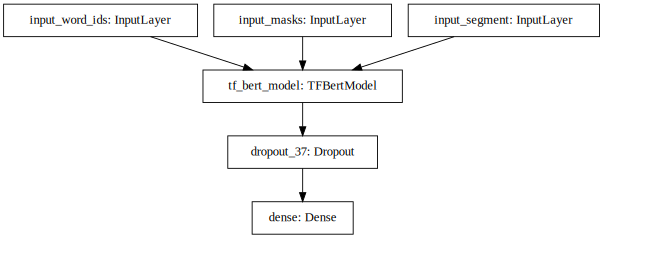

In [ ]:
from IPython.display import SVG
from keras.utils import model_to_dot


SVG(model_to_dot(sentiment_model, dpi=65).create(prog='dot', format='svg'))



## 훈련 및 성능 검증

In [ ]:
 tokens, masks, segments, targets = [], [], [], []
 SEQ_LEN = 128
 for i in test_text:
        # token : 문장을 토큰화함
        # if len(i) > 256: 이게 있어서 8000개만 추출된듯 
        i = i[:256]
        token = tokenizer.encode(i, max_length=SEQ_LEN, pad_to_max_length=True,truncation = True)
      
        # 마스크는 토큰화한 문장에서 패딩이 아닌 부분은 1, 패딩인 부분은 0으로 통일
        num_zeros = token.count(0)
        mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros
        
        # 문장의 전후관계를 구분해주는 세그먼트는 문장이 1개밖에 없으므로 모두 0
        segment = [0]*SEQ_LEN

        # 버트 인풋으로 들어가는 token, mask, segment를 tokens, segments에 각각 저장
        tokens.append(token)
        masks.append(mask)
        segments.append(segment)

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1773: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
tokens = np.array(tokens)
masks = np.array(masks)
segments = np.array(segments)
test_X = [tokens, masks, segments]

In [ ]:
test_X

[array([[   2,    0,    0, ...,    1,    1,    1],
        [   2,    0,    0, ...,    1,    1,    1],
        [   2,    0, 7735, ...,    1,    1,    1],
        ...,
        [   2,    0,    0, ...,    1,    1,    1],
        [   2,    0,    0, ...,    1,    1,    1],
        [   2,    0,    0, ...,    1,    1,    1]]),
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

In [ ]:
print(len(test_senti))
print(len(test_X[1]))

518
518


In [ ]:
# targets = []
# for i in df_test['Label']:
#   targets.append(i)

# targets = np.array(targets)
# test_y = targets

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_loss', patience = 7)


In [ ]:
sentiment_model.fit(train_X, 
                    train_senti, 
                    epochs=100, # epoch를 조금 더 높여서 해보기 
                    shuffle=True, 
                    batch_size=64, 
                    validation_data = (test_X, test_senti), 
                    callbacks = [es])

Epoch 1/100
19/19 [==============================] - 25s 1s/step - loss: 1.9704 - accuracy: 0.1516 - val_loss: 1.9562 - val_accuracy: 0.1004
Epoch 2/100
19/19 [==============================] - 19s 1s/step - loss: 1.9709 - accuracy: 0.1582 - val_loss: 1.9492 - val_accuracy: 0.1062
Epoch 3/100
19/19 [==============================] - 19s 1s/step - loss: 1.9647 - accuracy: 0.1533 - val_loss: 1.9401 - val_accuracy: 0.1120
Epoch 4/100
19/19 [==============================] - 20s 1s/step - loss: 1.9561 - accuracy: 0.1574 - val_loss: 1.9219 - val_accuracy: 0.2201
Epoch 5/100
19/19 [==============================] - 19s 1s/step - loss: 1.9368 - accuracy: 0.1955 - val_loss: 1.9038 - val_accuracy: 0.2239
Epoch 6/100
19/19 [==============================] - 19s 1s/step - loss: 1.9101 - accuracy: 0.2270 - val_loss: 1.8908 - val_accuracy: 0.2471
Epoch 7/100
19/19 [==============================] - 19s 1s/step - loss: 1.8981 - accuracy: 0.2320 - val_loss: 1.8825 - val_accuracy: 0.2278
Epoch 8/100
1

훈련 모델의 예측 성능을 F1 SCORE로 체크하기 위한 작업

In [ ]:
def predict_convert_data(data_df):
    global tokenizer
    tokens, masks, segments = [], [], []
    
    for i in tqdm(range(len(data_df))):

        token = tokenizer.encode(data_df[DATA_COLUMN][i], max_length=SEQ_LEN, pad_to_max_length=True)
        num_zeros = token.count(0)
        mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros
        segment = [0]*SEQ_LEN

        tokens.append(token)
        segments.append(segment)
        masks.append(mask)

    tokens = np.array(tokens)
    masks = np.array(masks)
    segments = np.array(segments)
    return [tokens, masks, segments]

# 위에 정의한 convert_data 함수를 불러오는 함수를 정의
def predict_load_data(pandas_dataframe):
    data_df = pandas_dataframe
    data_df[DATA_COLUMN] = data_df[DATA_COLUMN].astype(str)
    data_x = predict_convert_data(data_df)
    return data_x

test 데이터 예측하기

In [ ]:
preds = sentiment_model.predict(test_X)

In [ ]:
# 부정이면 0, 긍정이면 1 출력
preds

array([[0.0747472 , 0.02341385, 0.27060387, ..., 0.04540637, 0.38907334,
        0.18203995],
       [0.0382646 , 0.88527256, 0.01159569, ..., 0.01409719, 0.01883341,
        0.01227032],
       [0.02693178, 0.8883302 , 0.01353424, ..., 0.01432784, 0.02339451,
        0.01342529],
       ...,
       [0.85780394, 0.01238079, 0.02959077, ..., 0.03125099, 0.03626093,
        0.02240819],
       [0.792392  , 0.01677608, 0.0368771 , ..., 0.02920268, 0.03854738,
        0.05656927],
       [0.02978282, 0.84510326, 0.02326259, ..., 0.02027677, 0.04342473,
        0.0186724 ]], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report
y_true = test_senti
# F1 Score 확인
print(classification_report(y_true, np.round(preds,0)))

              precision    recall  f1-score   support

           0       0.47      0.44      0.45       126
           1       0.64      0.76      0.70        86
           2       1.00      0.02      0.03        59
           3       0.49      0.32      0.39        69
           4       0.71      0.08      0.15        59
           5       0.40      0.14      0.20        59
           6       0.45      0.35      0.39        60

   micro avg       0.53      0.34      0.41       518
   macro avg       0.60      0.30      0.33       518
weighted avg       0.58      0.34      0.37       518
 samples avg       0.34      0.34      0.34       518



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import logging
tf.get_logger().setLevel(logging.ERROR)

In [ ]:
def sentence_convert_data(data):
    global tokenizer
    tokens, masks, segments = [], [], []

    data = text_tokenizing(text_cleaning(data)) # 이거

    token = tokenizer.encode(data, max_length=SEQ_LEN, pad_to_max_length=True)
    
    num_zeros = token.count(0) 
    mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros 
    segment = [0]*SEQ_LEN

    tokens.append(token)
    segments.append(segment)
    masks.append(mask)

    tokens = np.array(tokens)
    masks = np.array(masks)
    segments = np.array(segments)
    return [tokens, masks, segments]

def child_evaluation_predict(sentence):
    data_x = sentence_convert_data(sentence)
    predict = sentiment_model.predict(data_x)
    predict_value = np.ravel(predict)
 

    categories = ['해당없음', '아동기준 학대 심각성 및 지속성', '피해아동 특성','생활 환경','학대자기준 학대 심각성 및 지속성','학대 인식', '학대 행위자 특성']

    N = len(categories)

    values = np.round(predict, 3).flatten().tolist()
    values += values[:1]

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    plt.polar(angles, values)
    plt.fill(angles, values, alpha = 10.0)
    plt.xticks(angles[:-1], categories)

    plt.yticks([0,0.25,0.5,0.75,1.0])
    plt.ylim(0,1)
    
    plt.show()
    
    
    

In [ ]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# from math import pi
# f = plt.figure(figsize=(10,5))
# categories=['consistency', 'correctness', 'completeness']
# N = len(categories)
# values=[59,80,60]
# values += values[:1]
# values
# angles = [n / float(N) * 2 * pi for n in range(N)]
# angles += angles[:1]
# ax = f.add_subplot(111, polar=True)
# plt.xticks(angles[:-1], categories, color='grey', size=8)
# ax.set_rlabel_position(180)
# plt.yticks([20,40,60,80,100], ["20","40","60","80","100"], color="grey", size=10)
# plt.ylim(0,100)
# ax.plot(angles, values, 'o-', linewidth=1, linestyle='solid')
# ax.fill(angles, values, 'b', alpha=0.1)

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1773: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


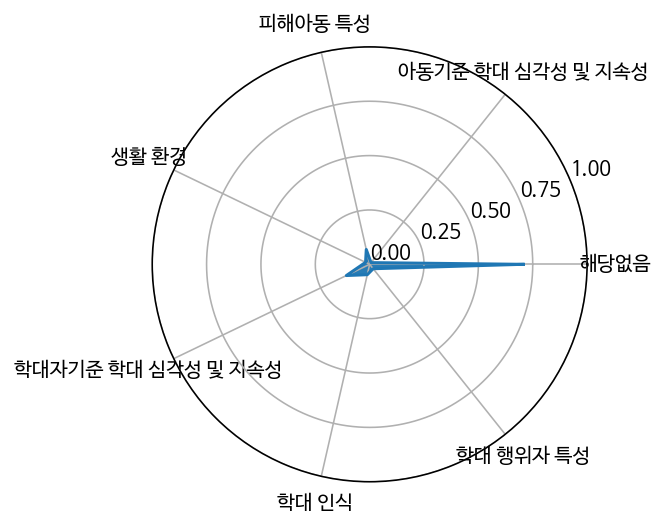

In [ ]:
child_evaluation_predict("오늘 엄마랑 아빠랑 놀이동산에 놀러갔다. 추러스도 먹고 맛있는 핫도그도 먹고 재밌는 롤러코스터도 많이 탔다. 집에 돌아오는길에 차에서 토했는데 엄마랑 아빠가 왜그러냐며 뭐라하셨다. 속상했다")

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1773: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


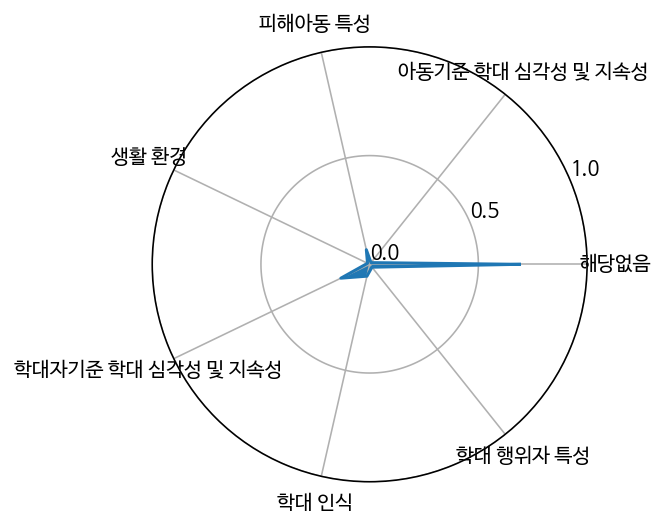

In [ ]:
child_evaluation_predict("3일째 부모님이 술마시느라 집에 안들어오고 있고 전화를 해도 안받아요. 집에 먹을게 없어요... 라면을 어떻게 끓이는 건가요")

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1773: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


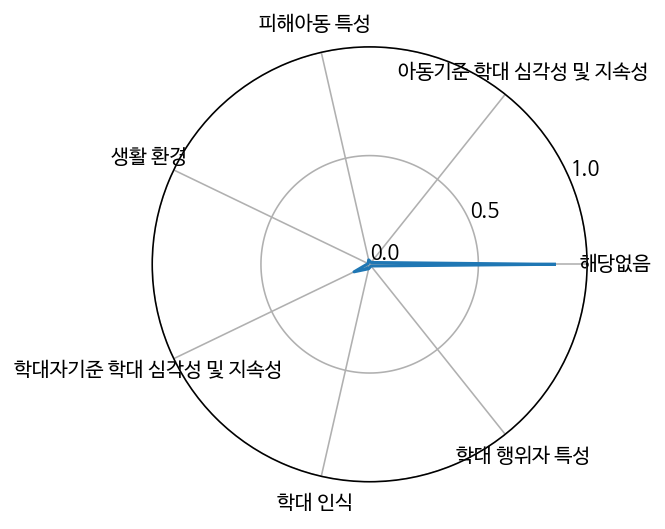

In [ ]:
child_evaluation_predict("엄마가 용돈을 안주고 돈도 없고 우울하네요 가출을 할까요?")

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1773: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


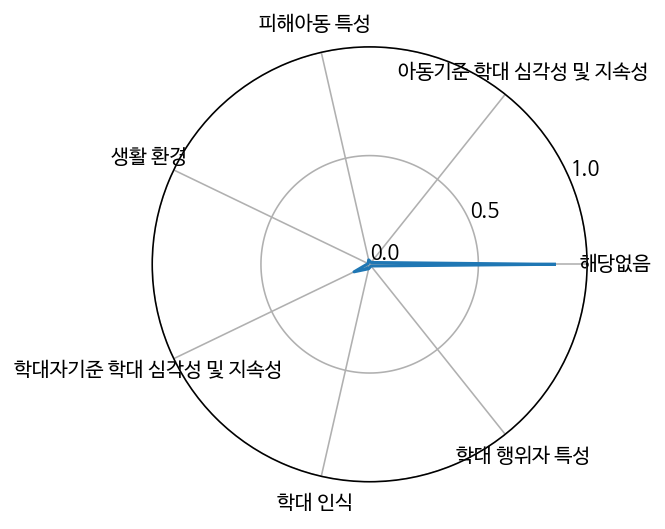

In [ ]:
child_evaluation_predict("오늘 집에 늦게 들어갔는데 아빠가 시발새끼라고 했어요")

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1773: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


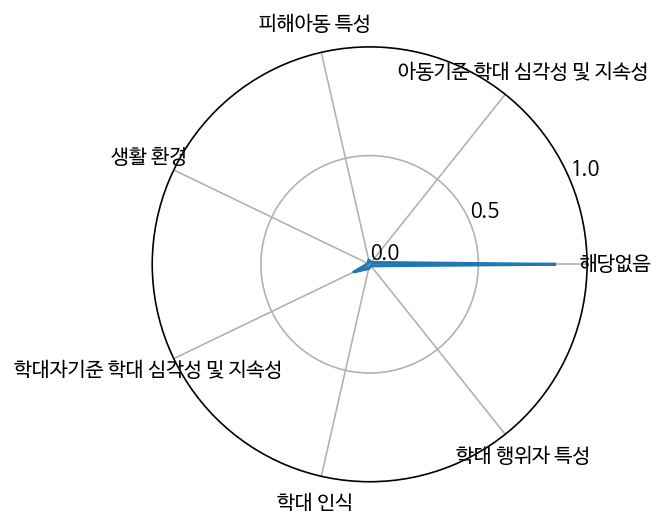

In [ ]:
child_evaluation_predict("그래서 뒤를 돌아봤는데 알고보니 제가 아니라 옆집아저씨한테 하는 말이었어요. 다행이에요. ")

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1773: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


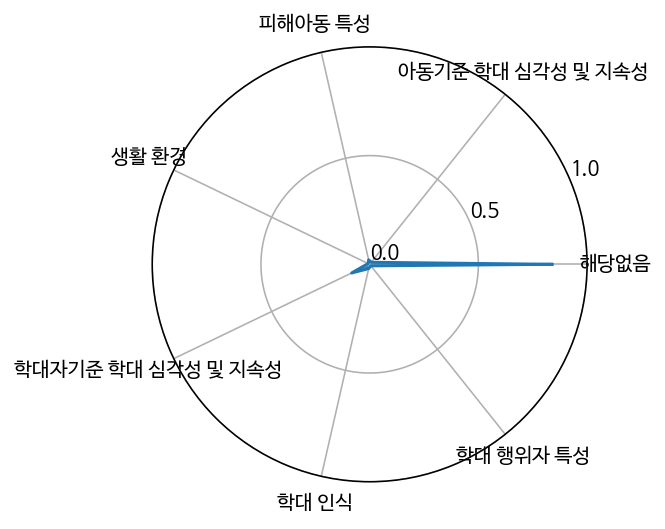

In [ ]:
child_evaluation_predict("동네아저씨들이 욕을 하면서 서로 싸우고 있는 걸보면서 지나갔는데 알고 봤더니 아빠가 나한테 욕을 하고 있었어요.")

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1773: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


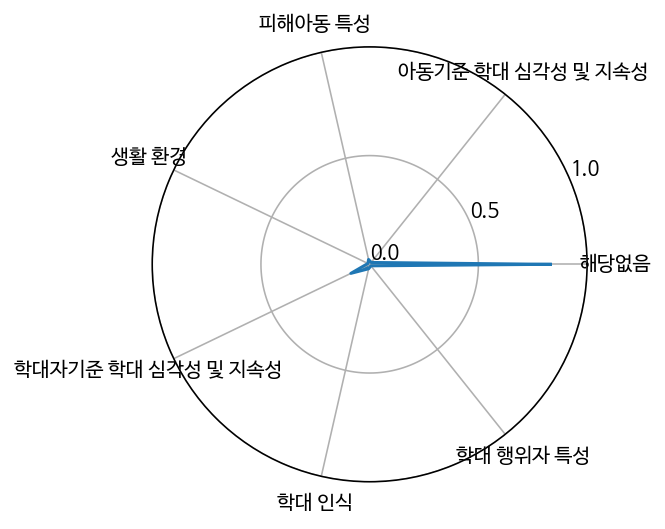

In [ ]:
child_evaluation_predict("아빠 지갑에서 삼만원을 훔쳤는데.. 걸리자마자 속옷차림으로 쫓겨났어요.. 저 어디가야하죠?")